# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import re
import time
# for better visual parameters
sns.set()

In [2]:
from IPython.display import display, HTML

# Data Needed to Work

In [3]:
g1 = pd.read_excel('games1.xlsx')
g2 = pd.read_excel('games2.xlsx')
g3 = pd.read_excel('games3.xlsx')
g4 = pd.read_excel('games4.xlsx')
g5 = pd.read_excel('games5.xlsx')
g6 = pd.read_excel('games6.xlsx')
g7 = pd.read_excel('games7.xlsx')
g8 = pd.read_excel('games8.xlsx')
g9 = pd.read_excel('games9.xlsx')
g10 = pd.read_excel('games10.xlsx')

In [4]:
df = pd.concat([g1, g2, g3, g4, g5, g6, g7, g8, g9, g10], ignore_index=True)

In [5]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200.0,Galactic Bowling,2008-10-21,0 - 20000,0.0,0.0,19.99,0.0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370.0,Train Bandit,2017-10-12,0 - 20000,0.0,0.0,0.99,0.0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930.0,Jolt Project,2021-11-17,0 - 20000,0.0,0.0,4.99,0.0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720.0,Henosis™,2020-07-23,0 - 20000,0.0,0.0,5.99,0.0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950.0,Two Weeks in Painland,2020-02-03,0 - 20000,0.0,0.0,0.00,0.0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120.0,SUR5,2023-04-01,0 - 0,0.0,0.0,0.00,0.0,"Innovative Gameplay SUR5 brings a brand new, f...","['English', 'Polish', 'Spanish - Latin America']",...,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71712,2125160.0,Prison Life 2,2023-03-30,0 - 20000,6.0,0.0,10.79,0.0,Core Features Real players only! All Guards an...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71713,2318860.0,Architecture Zeitgeist,2023-03-27,0 - 20000,0.0,0.0,5.99,0.0,Architecture Zeitgeist is a game created with ...,"['English', 'Japanese', 'Portuguese - Brazil',...",...,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
71714,2180330.0,Girl's Way to Survive 2: Bloody Museum,2023-04-02,0 - 0,0.0,0.0,2.39,0.0,"Development progress: prologue map (finished),...",['Simplified Chinese'],...,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   AppID                       71716 non-null  float64       
 1   Name                        71716 non-null  object        
 2   Release date                71716 non-null  datetime64[ns]
 3   Estimated owners            71716 non-null  object        
 4   Peak CCU                    71716 non-null  float64       
 5   Required age                71716 non-null  float64       
 6   Price                       71716 non-null  float64       
 7   DLC count                   71716 non-null  float64       
 8   About the game              69384 non-null  object        
 9   Supported languages         71716 non-null  object        
 10  Full audio languages        71716 non-null  object        
 11  Reviews                     9167 non-null   object    

# Data cleaning

**NaN in categories and genre**

In [7]:
# Replace NaN values in 'Categories' and 'Genres'
df['Categories'].fillna('unspecified', inplace=True)
df['Genres'].fillna('unspecified', inplace=True)

**Date**

In [8]:
# Convert 'Release date' to datetime format
df['Release date'] = pd.to_datetime(df['Release date'])

In [9]:
df[['Release date']].dtypes

Release date    datetime64[ns]
dtype: object

**Remove Row**

In [10]:
df = df.dropna(subset=['Name','Release date'])

**Remove Unwanted columns**

In [11]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

In [12]:
df.drop(columns = ['About the game', 'Website', 'Support url', 'Support email','Notes', 'Screenshots', 'Movies'])

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,Supported languages,Full audio languages,...,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
0,20200.0,Galactic Bowling,2008-10-21,0 - 20000,0.0,0.0,19.99,0.0,['English'],[],...,0,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling"
1,655370.0,Train Bandit,2017-10-12,0 - 20000,0.0,0.0,0.99,0.0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc..."
2,1732930.0,Jolt Project,2021-11-17,0 - 20000,0.0,0.0,4.99,0.0,"['English', 'Portuguese - Brazil']",[],...,0,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN
3,1355720.0,Henosis™,2020-07-23,0 - 20000,0.0,0.0,5.99,0.0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz..."
4,1139950.0,Two Weeks in Painland,2020-02-03,0 - 20000,0.0,0.0,0.00,0.0,"['English', 'Spanish - Spain']",[],...,0,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71711,2159120.0,SUR5,2023-04-01,0 - 0,0.0,0.0,0.00,0.0,"['English', 'Polish', 'Spanish - Latin America']","['English', 'Spanish - Latin America']",...,0,0,0,0,0,Katharsis,Katharsis,"Single-player,Multi-player,PvP,Online PvP,Stea...","Free to Play,Indie,Massively Multiplayer,Strat...",NaN
71712,2125160.0,Prison Life 2,2023-03-30,0 - 20000,6.0,0.0,10.79,0.0,"['English', 'French', 'Italian', 'German', 'Sp...",[],...,0,0,0,0,0,AO Games,AO Games,"Single-player,Multi-player,PvP,Online PvP,Co-o...","Casual,Indie,RPG,Simulation,Strategy","First-Person,Detective,Social Deduction,Multip..."
71713,2318860.0,Architecture Zeitgeist,2023-03-27,0 - 20000,0.0,0.0,5.99,0.0,"['English', 'Japanese', 'Portuguese - Brazil',...",[],...,0,0,0,0,0,Matheus Rudo,Rudo Studios,Single-player,"Casual,Simulation,Early Access","Casual,Simulation,Puzzle,Exploration,Immersive..."
71714,2180330.0,Girl's Way to Survive 2: Bloody Museum,2023-04-02,0 - 0,0.0,0.0,2.39,0.0,['Simplified Chinese'],[],...,0,0,0,0,0,绅士游戏工坊,绅士游戏工坊,Single-player,"Action,Casual,Indie,RPG,Early Access",NaN


In [13]:
df = df.drop(columns = ['About the game', 'Website', 'Support url', 'Support email','Notes', 'Screenshots', 'Movies'])

# EDA

### Popularity Analysis

In [14]:
data = []

# Iterate each row
for index, row in df.iterrows():
    # Append to list
    data.append({'Game Name': row['Name'], 
                 'Header Image': f'<img src="{row["Header image"]}" width="100" height="100">', 
                 'Score Rank': row['Score rank']})

# Sort data 
data.sort(key=lambda x: x['Score Rank'])


TopRank= data[:50]
display_df = pd.DataFrame(TopRank)
display(HTML(display_df.to_html(escape=False)))


,Game Name,Header Image,Score Rank
0,Galactic Bowling,,NaN
1,Train Bandit,,NaN
2,Jolt Project,,NaN
3,Henosis™,,NaN
4,Two Weeks in Painland,,NaN
5,Wartune Reborn,,NaN
6,TD Worlds,,NaN
7,Legend of Rome - The Wrath of Mars,,NaN
8,MazM: Jekyll and Hyde,,NaN
9,Deadlings: Rotten Edition,,NaN


In [15]:
data = []

# Iterate each row
for index, row in df.iterrows():
    # Append to list
    data.append({'Game Name': row['Name'], 
                 'Header Image': f'<img src="{row["Header image"]}" width="100" height="100">', 
                 'Peak CCU': row['Peak CCU']}) 

# Sort data
data.sort(key=lambda x: x['Peak CCU'], reverse=True)

Top50PeakCCU = data[:50]
display_df = pd.DataFrame(Top50PeakCCU)
display(HTML(display_df.to_html(escape=False)))


,Game Name,Header Image,Peak CCU
0,Hogwarts Legacy,,872138.0
1,Counter-Strike: Global Offensive,,825215.0
2,Dota 2,,558759.0
3,Sons Of The Forest,,405191.0
4,Lost Ark,,287501.0
5,PUBG: BATTLEGROUNDS,,275374.0
6,Apex Legends™,,235067.0
7,Call of Duty®: Modern Warfare® II,,233454.0
8,Grand Theft Auto V,,170527.0
9,Resident Evil 4,,153726.0


In [16]:
data = []

# Iterate each row
for index, row in df.iterrows():
    # Append to list
    data.append({'Game Name': row['Name'], 
                 'Header Image': f'<img src="{row["Header image"]}" width="100" height="100">', 
                 'Positive': row['Positive']})  # Use 'Positive' column for ranking

# Sort data by +ve 
data.sort(key=lambda x: x['Positive'], reverse=True)

TopPosRev = data[:50]
display_df = pd.DataFrame(TopPosRev) 
display(HTML(display_df.to_html(escape=False)))


,Game Name,Header Image,Positive
0,Counter-Strike: Global Offensive,,5764420
1,Dota 2,,1477153
2,Grand Theft Auto V,,1171197
3,PUBG: BATTLEGROUNDS,,1154655
4,Terraria,,964983
5,Tom Clancy's Rainbow Six® Siege,,929372
6,Team Fortress 2,,823693
7,Garry's Mod,,822326
8,Rust,,703687
9,Left 4 Dead 2,,619457


Correlation between Peak CCU and Metacritic score: 0.057059071651939026
Correlation between Peak CCU and User score: -0.0004723929018033805


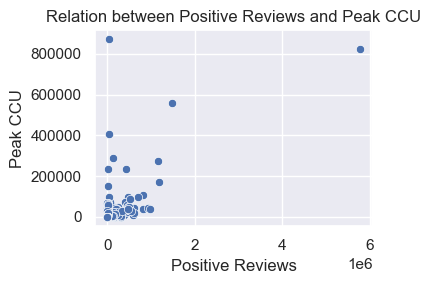

In [17]:
# Calc. correlation
corr_meta = df['Peak CCU'].corr(df['Metacritic score'])
corr_us = df['Peak CCU'].corr(df['User score'])
print("Correlation between Peak CCU and Metacritic score:", corr_meta)
print("Correlation between Peak CCU and User score:", corr_us)

# Scatter Plot Rev. vs +ve
plt.figure(figsize=(4, 3))
sns.scatterplot(x='Positive', y='Peak CCU', data=df)
plt.xlabel('Positive Reviews')
plt.ylabel('Peak CCU')
plt.title("Relation between Positive Reviews and Peak CCU")
plt.tight_layout()
plt.show()


### Price Analysis

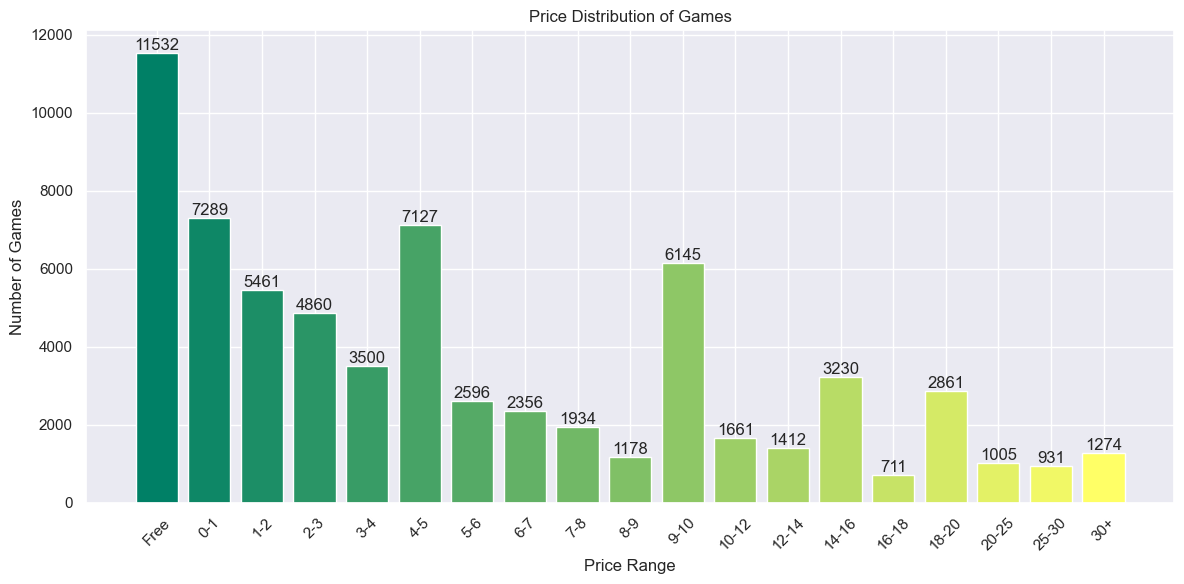

In [18]:
# price ranges
price_ranges = [(-1, 0), (0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), 
                (10, 12), (12, 14), (14, 16), (16, 18), (18, 20), (20, 25), (25, 30), (30, float('inf'))]
labels = ['Free', '0-1','1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10', '10-12', 
          '12-14', '14-16', '16-18', '18-20', '20-25', '25-30', '30+']

# Empty list
price_counts = []

# Count no. of games in price range
for start, end in price_ranges:
    count = ((df['Price'] > start) & (df['Price'] <= end)).sum()
    price_counts.append(count)

ManyColors = plt.cm.summer(np.linspace(0, 1, len(labels)))
    
# Bar graph
plt.figure(figsize=(12, 6))
plt.bar(labels, price_counts, color= ManyColors)

# Add data labels
for i, count in enumerate(price_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels to the x-axis
plt.xlabel('Price Range')
plt.ylabel('Number of Games')
plt.title('Price Distribution of Games')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()


Correlation between Price and Metacritic score: 0.1493560140815325
Correlation between Price and User score: -0.0003803012710259241


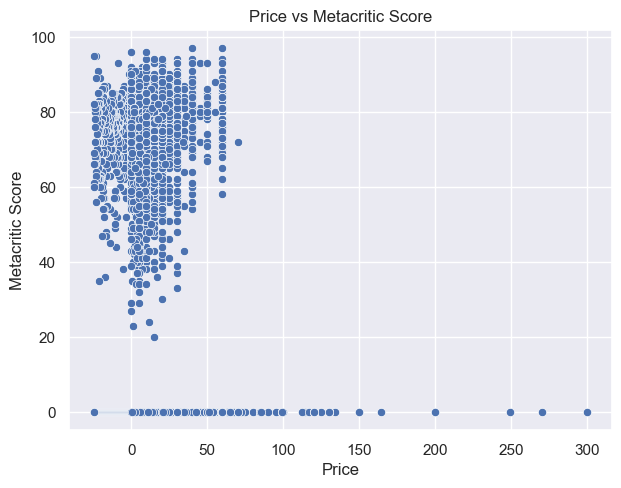

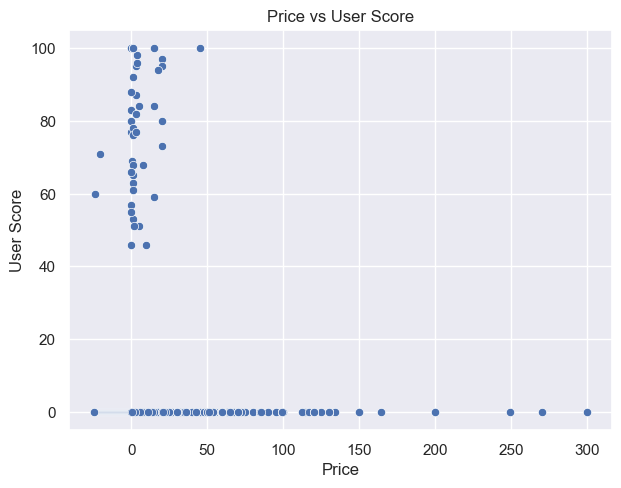

In [19]:
# Corr. Calc.
corr_P_M = df['Price'].corr(df['Metacritic score'])
print("Correlation between Price and Metacritic score:", corr_P_M)

correlation_P_US = df['Price'].corr(df['User score'])
print("Correlation between Price and User score:", correlation_P_US)

# Scatter plot 1
plt.figure(figsize=(7,5.2))
sns.scatterplot(x='Price', y='Metacritic score', data=df)
plt.xlabel('Price')
plt.ylabel('Metacritic Score')
plt.title('Price vs Metacritic Score')

# Scatter plot 2
plt.figure(figsize=(7,5.2))
sns.scatterplot(x='Price', y='User score', data=df)
plt.xlabel('Price')
plt.ylabel('User Score')
plt.title('Price vs User Score')


plt.show()

### Review analysis

<Figure size 400x300 with 0 Axes>

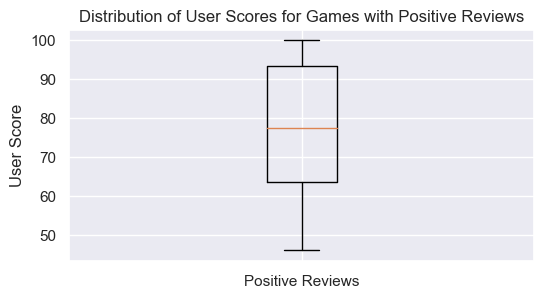

In [20]:
# Define Threshold for +ve
positive_threshold = 7
plt.figure(figsize=(4, 3))

# New df
df_positive = df[df['User score'] >= positive_threshold]

plt.figure(figsize=(6, 3)) 
plt.boxplot([df_positive['User score']],
            labels=['Positive Reviews'])
plt.title('Distribution of User Scores for Games with Positive Reviews')
plt.ylabel('User Score')
plt.grid(True)
plt.show()

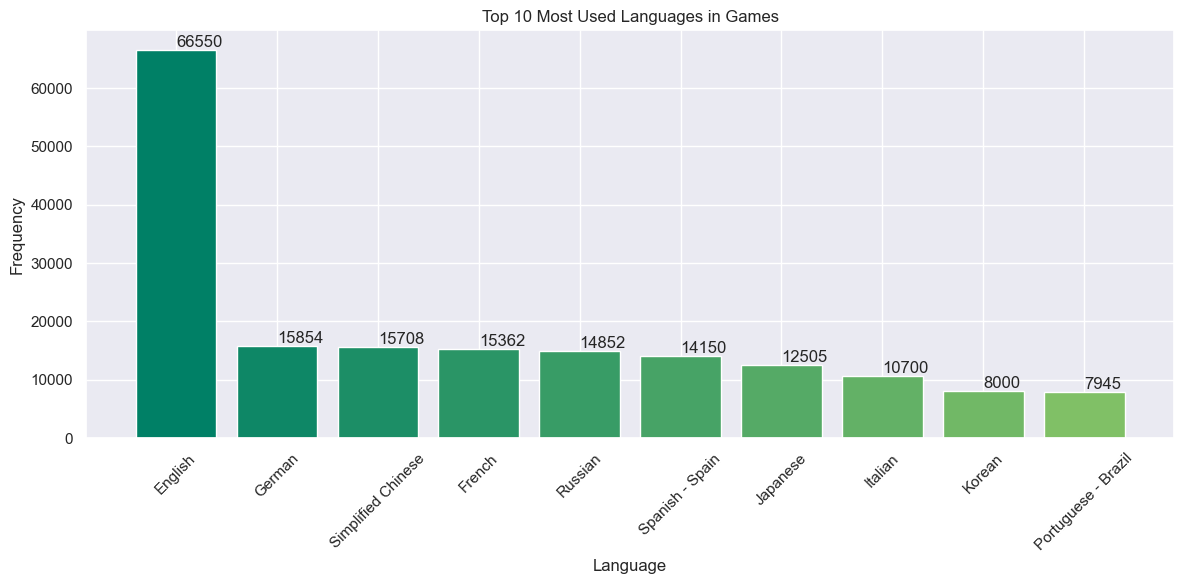

In [21]:
from collections import Counter

# Extracting unique language from list
supported_languages_list = [re.findall(r"'(.*?)'", languages) for languages in df['Supported languages']]

# Flattening the list
flattened_languages_list = [language for sublist in supported_languages_list for language in sublist]

# Count for instance of each language
language_counts = Counter(flattened_languages_list)

# Top 10
top_10_languages = dict(language_counts.most_common(10))

# Plot Bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_languages.keys(), top_10_languages.values(), color=ManyColors)
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Languages in Games')
plt.xticks(rotation=45)

# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()


### Popular Genre

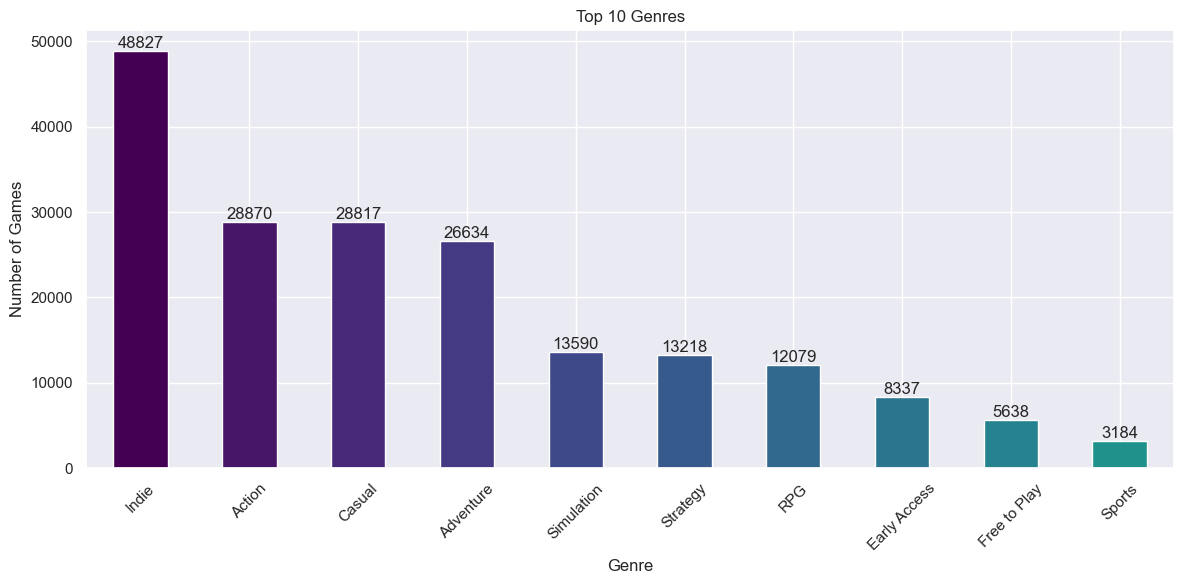

In [22]:
all_genre = df['Genres'].str.split(',').explode()

# Count occurrences
genre_count = all_genre.value_counts()

# Select Top 10
top_10_genre = genre_count.head(10)

ALotColors = plt.cm.viridis(np.linspace(0, 1, len(labels)))

# Plot bar graph
plt.figure(figsize=(12, 6))
top_10_genre.plot(kind='bar', color=ALotColors)

# Add data label
for i, count in enumerate(top_10_genre):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add label
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.title('Top 10 Genres')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

### Top Publishers

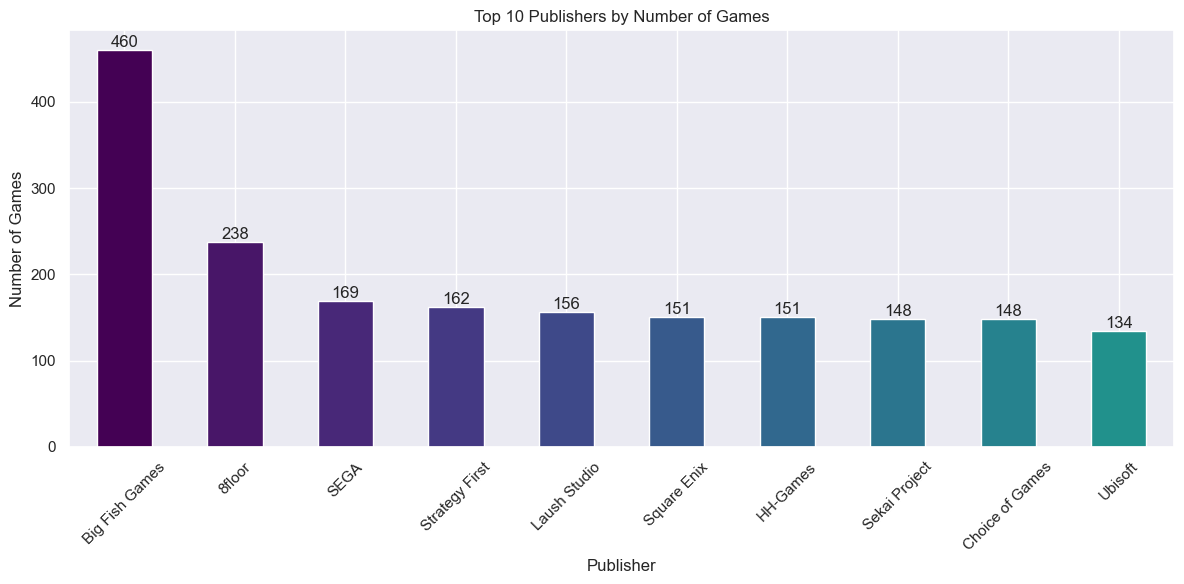

In [23]:
publisher_count = df['Publishers'].value_counts()

# Select top 10 publishers
top_10_publisher = publisher_count.head(10)

# Plot the bar graph
plt.figure(figsize=(12, 6))
top_10_publisher.plot(kind='bar', color=ALotColors)

# Add data labels
for i, count in enumerate(top_10_publisher):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Add labels 
plt.xlabel('Publisher')
plt.ylabel('Number of Games')
plt.title('Top 10 Publishers by Number of Games')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

### OS Analysis

In [24]:
# Games supporting only Windows
only_windows = ((df['Windows'] == 1) & (df['Mac'] == 0) & (df['Linux'] == 0)).sum()

# Games supporting only Mac
only_mac = ((df['Windows'] == 0) & (df['Mac'] == 1) & (df['Linux'] == 0)).sum()

# Games supporting only Linux
only_linux = ((df['Windows'] == 0) & (df['Mac'] == 0) & (df['Linux'] == 1)).sum()

# Games supporting only both Windows and Mac
windows_and_mac = ((df['Windows'] == 1) & (df['Mac'] == 1) & (df['Linux'] == 0)).sum()

# Games supporting only both Windows and Linux
windows_and_linux = ((df['Windows'] == 1) & (df['Mac'] == 0) & (df['Linux'] == 1)).sum()

# Games supporting only both Mac and Linux
mac_and_linux = ((df['Windows'] == 0) & (df['Mac'] == 1) & (df['Linux'] == 1)).sum()

# Games supporting all three operating systems
all_three = ((df['Windows'] == 1) & (df['Mac'] == 1) & (df['Linux'] == 1)).sum()

# Print the counts
print("Games supporting only Windows:", only_windows)
print("Games supporting only Mac:", only_mac)
print("Games supporting only Linux:", only_linux)
print("Games supporting only both Windows and Mac:", windows_and_mac)
print("Games supporting only both Windows and Linux:", windows_and_linux)
print("Games supporting only both Mac and Linux:", mac_and_linux)
print("Games supporting all three operating systems:", all_three)


Games supporting only Windows: 55000
Games supporting only Mac: 22
Games supporting only Linux: 3
Games supporting only both Windows and Mac: 6720
Games supporting only both Windows and Linux: 2154
Games supporting only both Mac and Linux: 1
Games supporting all three operating systems: 7816


**Most games support Windows OS**

### Game Release Analysis

In [25]:
# Sort by the 'Release date'
df_sorted = df.sort_values(by='Release date', ascending = False)

df_sorted[['Name', 'Release date' ]]

,Name,Release date
66999,XTAL,2025-04-14
65533,Transcendence,2023-12-31
63777,Death Corp,2023-11-01
71616,Yao-Guai Hunter,2023-04-03
71609,I am The Exorcist,2023-04-02
...,...,...
25313,POSTAL,1997-11-14
25829,POSTAL,1997-11-14
27893,POSTAL,1997-11-14
26345,POSTAL,1997-11-14


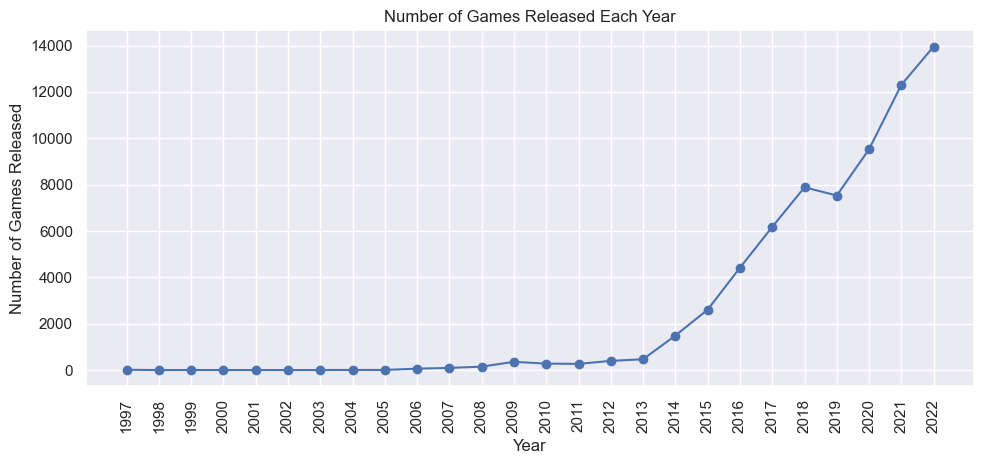

In [26]:
# Extract year from 'Release date' 
df['Year'] = df['Release date'].dt.year

# Filter data
df_filtered = df[df['Year'] <= 2022]

# Group data by year and count
games_released_by_year = df_filtered.groupby('Year').size()

# Plot line graph
plt.figure(figsize=(10, 4.8))
games_released_by_year.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Number of Games Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')
plt.xticks(games_released_by_year.index, rotation=90)  # Rotate x-axis labels by 90 degrees
plt.grid(True)


plt.tight_layout()
plt.show()


**Game development have increased over the years and specially after 2013 there ia s significant rise**

### Playing Analysis

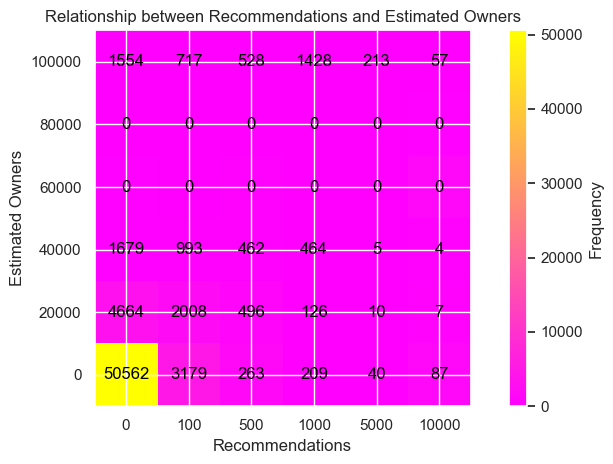

In [27]:
# Convert string to integers
df['Recommendations'] = df['Recommendations'].astype(int)

# Extract lower bound and convert to integers
df['Estimated owners'] = df['Estimated owners'].str.split(' - ').str[0].astype(int)

# Define the bins
recommendation_bins = [0, 100, 500, 1000, 5000, 10000, 200000]
owner_bins = [0, 20000, 40000, 60000, 80000, 100000, 200000]

# Compute the 2D histogram
hist, x_edges, y_edges = np.histogram2d(df['Recommendations'], df['Estimated owners'], bins=[recommendation_bins, owner_bins])

# Plot heatmap
plt.figure(figsize=(8, 4.8))
plt.imshow(hist, interpolation='nearest', origin='lower', cmap='spring')

# Add data labels
for i in range(len(owner_bins)-1):
    for j in range(len(recommendation_bins)-1):
        plt.text(j, i, int(hist[j, i]), ha='center', va='center', color='black')

plt.title('Relationship between Recommendations and Estimated Owners')
plt.xlabel('Recommendations')
plt.ylabel('Estimated Owners')
plt.xticks(np.arange(len(recommendation_bins)-1), recommendation_bins[:-1])
plt.yticks(np.arange(len(owner_bins)-1), owner_bins[:-1])
plt.colorbar(label='Frequency')
plt.tight_layout()
plt.show()


### Top Categories

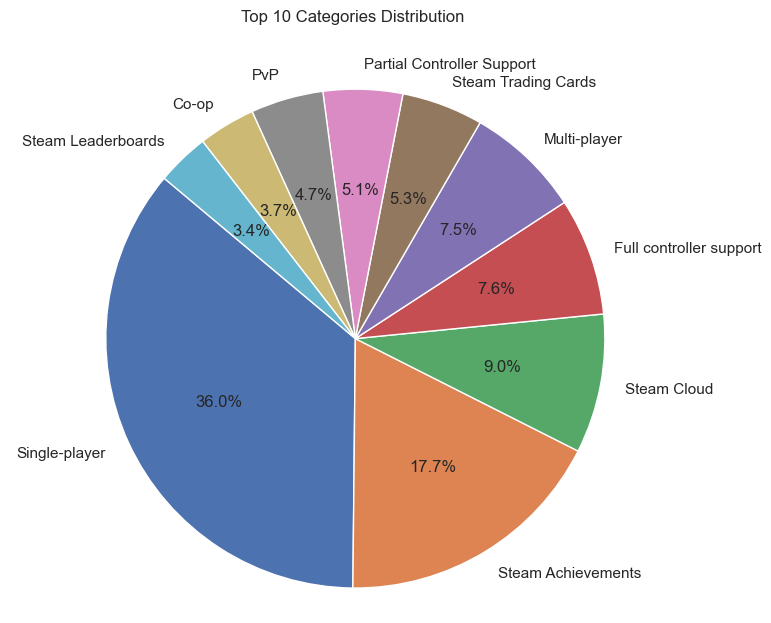

In [28]:
# Extract categories
all_categories = df['Categories'].str.split(',').explode()

# Count each category
category_counts = all_categories.value_counts()

# Select top 10
top_category_counts = category_counts.head(10)

# Plot pie chart
plt.figure(figsize=(8, 6.4))
plt.pie(top_category_counts, labels=top_category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Categories Distribution \n\n')
plt.axis('equal') 


plt.tight_layout()
plt.show()
